In [156]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [157]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [158]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import time
import seaborn as sns

In [159]:
import shap

## Load dataset

In [160]:
path_out = r'F:\Codes\joint attention\Nano-particle\output_new_new'

file_path_features_norm = os.path.join(path_out , 'features_normalized_35.npy')
file_path_labels = os.path.join(path_out , 'label_r_avg_raw.npy')
file_path_features_original = os.path.join(path_out , 'features_raw_35.npy')

with open( file_path_features_original , 'rb') as f:
    features_orig = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_norm , 'rb') as f:
    features_norm = np.load(f)

print(features_orig.shape)
print(labels.shape)
print(features_norm.shape)

(3999, 35)
(3999, 1)
(3999, 35)


In [161]:
df_original = pd.DataFrame(features_orig, columns=[ f'feature_{i}' for i in range(35)])
df_norm = pd.DataFrame(features_norm, columns=[ f'feature_{i}' for i in range(35)])

In [162]:
df_original.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,273.0,0.000025,1.0,2.710000e-26,0.0,81.0,119.0,0.0,105.0,229.0,...,8936.0,95.5363,34.169839,24.0,23.0,2.0,8.0,2.5153,2.7535,2.1026
1,273.0,0.000025,2.0,2.780000e-26,0.0,65.0,81.0,1.0,111.0,213.0,...,9090.0,95.5073,34.245992,30.0,35.0,1.0,7.0,2.5335,2.9188,1.8783
2,273.0,0.000025,3.0,7.850000e-26,4.0,204.0,168.0,24.0,306.0,304.0,...,26399.0,96.0506,34.609982,700.0,376.0,0.0,17.0,7.3030,8.4074,4.3813
3,273.0,0.000025,4.0,1.220000e-25,8.0,178.0,246.0,46.0,383.0,282.0,...,40689.0,96.3417,34.742688,1858.0,823.0,0.0,11.0,9.5565,11.0017,5.5250
4,273.0,0.000025,5.0,1.860000e-25,18.0,204.0,269.0,57.0,451.0,328.0,...,62641.0,96.5052,34.859251,3575.0,1350.0,0.0,28.0,9.8630,11.1281,5.5505


In [163]:
df_norm.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,0.0,0.1,0.000000,0.097059,0.000000,0.030440,0.048902,0.000000,0.037433,0.191472,...,0.096273,0.613760,0.265376,0.002188,0.005046,0.666667,0.048780,0.202272,0.207899,0.218424
1,0.0,0.1,0.111111,0.100000,0.000000,0.024427,0.033154,0.001032,0.039725,0.178094,...,0.098170,0.606908,0.308991,0.002735,0.007679,0.333333,0.042683,0.203906,0.221702,0.192378
2,0.0,0.1,0.222222,0.313025,0.002574,0.076663,0.069208,0.024768,0.114209,0.254181,...,0.311345,0.735269,0.517461,0.063816,0.082492,0.000000,0.103659,0.631955,0.680002,0.483029
3,0.0,0.1,0.333333,0.495798,0.005148,0.066892,0.101533,0.047472,0.143621,0.235786,...,0.487339,0.804045,0.593466,0.169386,0.180562,0.000000,0.067073,0.834201,0.896627,0.615837
4,0.0,0.1,0.444444,0.764706,0.011583,0.076663,0.111065,0.058824,0.169595,0.274247,...,0.757697,0.842674,0.660226,0.325918,0.296183,0.000000,0.170732,0.861708,0.907181,0.618798


In [ ]:
## check norm and 

## Visualize data

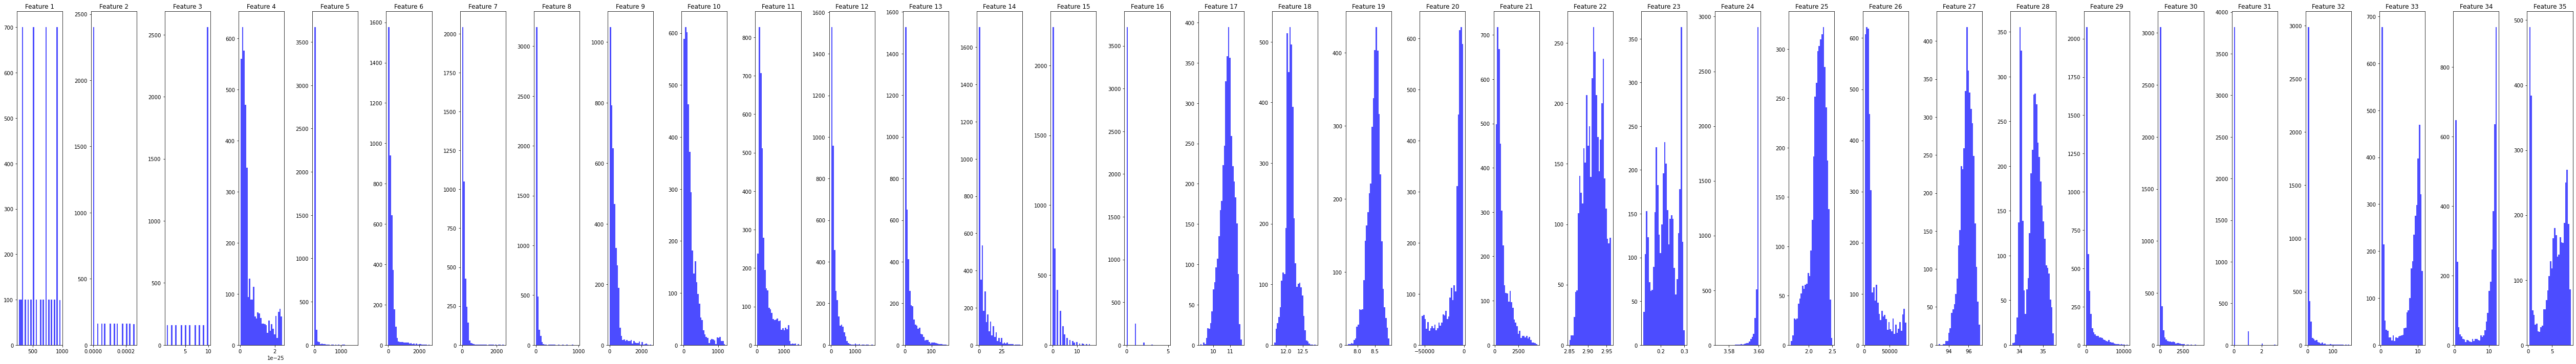

In [164]:
data = features_orig
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()


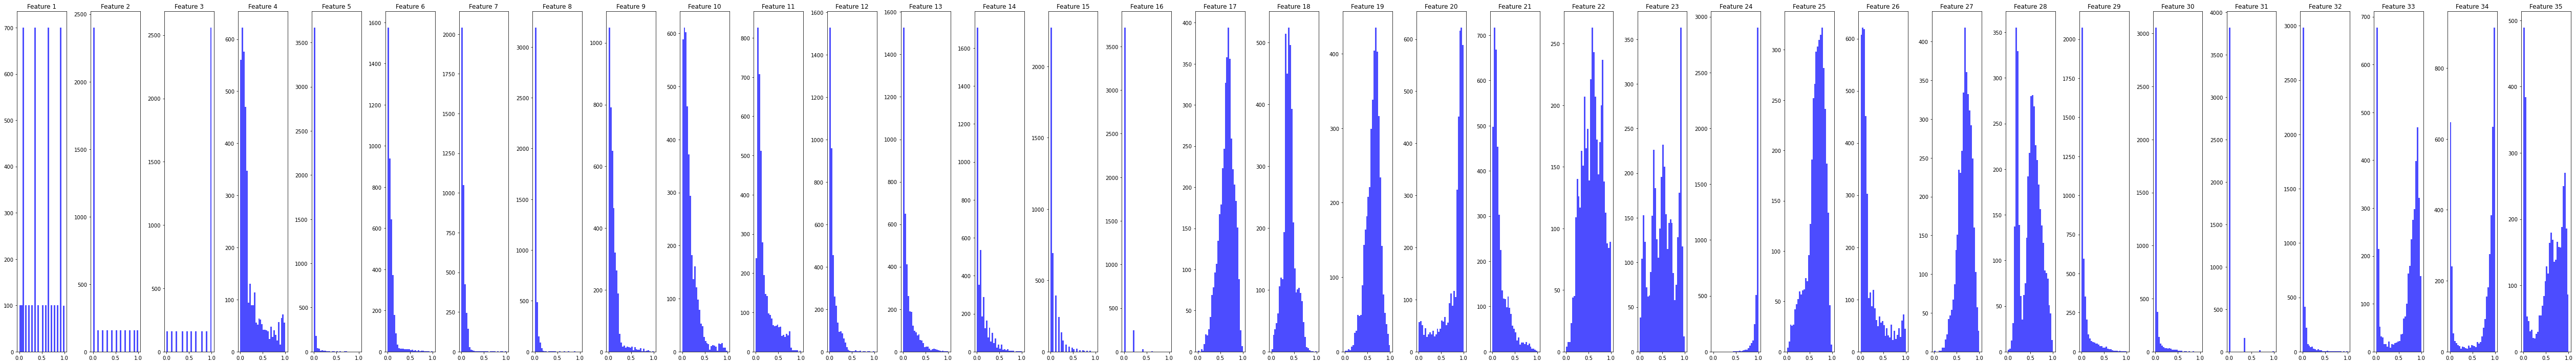

In [165]:
data = features_norm
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

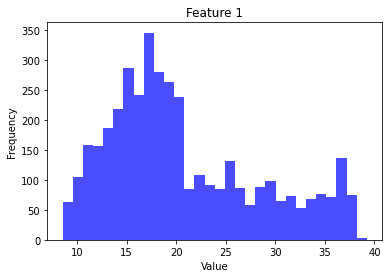

In [166]:
data = labels
plt.hist(data[:, 0], bins=30, color='blue', alpha=0.7)
plt.title('Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Split the dataset into train , test and validation splits

In [167]:
# Split data into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features_norm, labels, test_size=0.2, random_state=42)

print(f"features train shape: {features_train.shape}")
print(f"features test shape: {features_test.shape}") # tmp 
print(f"labels train shape: {labels_train.shape}")
print(f"labes test shape: {labels_test.shape}") # tmp

print(f"features train type: {type(features_train)}")
print(f"features test type: {type(features_test)}")
print(f"labels train type: {type(labels_train)}")
print(f"labes test type: {type(labels_test)}")

#test set again split into actual test and validation sets
features_validation, features_test, labels_validation, labels_test = train_test_split(features_test, labels_test, test_size=0.5, random_state=42)

print(f"features validation shape: {features_validation.shape}")
print(f"features test shape: {features_test.shape}")
print(f"labels validation shape: {labels_validation.shape}")
print(f"labes test shape: {labels_test.shape}")

print(f"features validation type: {type(features_validation)}")
print(f"features test type: {type(features_test)}")
print(f"labels validation type: {type(labels_validation)}")
print(f"labes test type: {type(labels_test)}")

features train shape: (3199, 35)
features test shape: (800, 35)
labels train shape: (3199, 1)
labes test shape: (800, 1)
features train type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels train type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>
features validation shape: (400, 35)
features test shape: (400, 35)
labels validation shape: (400, 1)
labes test shape: (400, 1)
features validation type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels validation type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>


In [168]:
def calc_MAPE_Percentage(actual_list , predicted_list):
#     assert len(predicted_list.shape) ==2
#     assert isinstance(predicted_list, list)
    assert len(actual_list.shape) == 2
    tmp=0
    num_samples = actual_list.shape[0]
        
    if len(predicted_list.shape) == 2:
#         print('con1')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i,0]))/(np.abs(actual_list[i,0]))
    elif len(predicted_list.shape) == 1:
#         print('con2')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i]))/(np.abs(actual_list[i,0])) 
    else:
        raise AssertionError
    MAPD = tmp/num_samples
    MAPD_perc = MAPD*100
    return MAPD_perc
    

## Model Training

## Linear Regression

In [169]:
models = {
    'Linear Regression': LinearRegression()
}

predictions_list = {'train':None,'test':None,'val':None}
models_ = []

for name, model in models.items():
    
    #train
    training_start = time.time()
    _tmp = model.fit(features_train, labels_train)
    training_end = time.time()
    
    models_.append(_tmp)
    
    #test and validation
    testing_start = time.time()
    predictions = model.predict(features_test)
    testing_end = time.time()
    predictions_list['test'] = predictions
    
    val_start = time.time()
    predictions = model.predict(features_validation)
    val_end = time.time()
    predictions_list['val'] = predictions
    
    train_start = time.time()
    predictions = model.predict(features_train)
    train_end = time.time()
    predictions_list['train'] = predictions
    
    #metrics for train, test and validation
    val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
    val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
    val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
    val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val']) 
    val_r2 = r2_score(labels_validation, predictions_list['val'])
    print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} ,MAPD: {val_mapd:.8f}, R^2: {val_r2:.10f}")
    
    train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
    train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
    train_mae = mean_absolute_error(labels_train, predictions_list['train'])
    train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train']) 
    train_r2 = r2_score(labels_train, predictions_list['train'])
    print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f},MAPD: {train_mapd:.8f}, R^2: {train_r2:.10f}")
    
    test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
    test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
    test_mae = mean_absolute_error(labels_test, predictions_list['test'])
    test_mapd = calc_MAPE_Percentage(labels_test,predictions_list['test']) 
    test_r2 = r2_score(labels_test, predictions_list['test'])
    print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f},MAPD: {test_mapd:.8f}, R^2: {test_r2:.10f}")
    
    print("Time taken for training: {:.10f} seconds".format(training_end - training_start)) 
    print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))
    print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))

Validation set with Linear Regression - RMSE: 0.5193965284, MSE: 0.2697727537, MAE: 0.3731080940 ,MAPD: 2.06544412, R^2: 0.9951456976
Train set with Linear Regression - RMSE: 0.4775336268, MSE: 0.2280383648, MAE: 0.3456889744,MAPD: 1.84565347, R^2: 0.9960526171
Test set with Linear Regression - RMSE: 0.4866830859, MSE: 0.2368604261, MAE: 0.3504097305,MAPD: 1.75046855, R^2: 0.9960907167
Time taken for training: 0.0030007362 seconds
Time taken for testing: 0.0000000000 seconds
Time taken for validation: 0.0000000000 seconds


In [170]:
type(models['Linear Regression'])

sklearn.linear_model._base.LinearRegression

In [171]:
models['Linear Regression'].coef_[0]

array([ 1.03973158e-01,  6.88064631e-01, -1.36837104e-01, -5.47626239e+00,
        7.70151558e+00,  7.64973289e+00,  4.20310709e-01, -8.53453024e-01,
        1.30389646e+01,  1.10511175e+01,  1.24678929e+01,  1.06172168e+01,
        7.06455417e-01, -4.72568155e-01,  4.62671781e-01,  2.21909220e-01,
        1.15191664e+01, -3.81504721e+00, -8.43609748e-01, -3.07994969e+01,
        4.47507720e+00, -8.13790376e-01,  6.54915242e-01,  4.52043219e-01,
       -1.10866691e-02, -2.68424600e+01,  8.48924857e-01,  9.95513786e-01,
       -6.93497281e-01, -8.75040862e-02, -2.74209952e-01, -1.05024485e+00,
        8.17307325e+00, -5.16917967e+00, -3.02829014e+00])

In [172]:
type(_tmp)

sklearn.linear_model._base.LinearRegression

In [173]:
array_ = models['Linear Regression'].coef_[0]
array = np.abs(array_)
# Sort the array in descending order and get the original indices
sorted_indices = np.argsort(array)[::-1]
sorted_array = array[sorted_indices]


In [174]:
sorted_array

array([3.07994969e+01, 2.68424600e+01, 1.30389646e+01, 1.24678929e+01,
       1.15191664e+01, 1.10511175e+01, 1.06172168e+01, 8.17307325e+00,
       7.70151558e+00, 7.64973289e+00, 5.47626239e+00, 5.16917967e+00,
       4.47507720e+00, 3.81504721e+00, 3.02829014e+00, 1.05024485e+00,
       9.95513786e-01, 8.53453024e-01, 8.48924857e-01, 8.43609748e-01,
       8.13790376e-01, 7.06455417e-01, 6.93497281e-01, 6.88064631e-01,
       6.54915242e-01, 4.72568155e-01, 4.62671781e-01, 4.52043219e-01,
       4.20310709e-01, 2.74209952e-01, 2.21909220e-01, 1.36837104e-01,
       1.03973158e-01, 8.75040862e-02, 1.10866691e-02])

In [175]:
sorted_indices

array([19, 25,  8, 10, 16,  9, 11, 32,  4,  5,  3, 33, 20, 17, 34, 31, 27,
        7, 26, 18, 21, 12, 28,  1, 22, 13, 14, 23,  6, 30, 15,  2,  0, 29,
       24], dtype=int64)

## LR coefficient-magnitude as a Explainability

In [176]:
col_names_str = "T, tau, time, Volume, S_100, S_111, S_110, S_311, Curve_1-10, Curve_11-20, Curve_21-30, Curve_31-40, Curve_41-50, Curve_51-60, Curve_61-70, Curve_71-80, Avg_total, Avg_bulk, Avg_surf, Total_E, Formation_E, Avg_bonds, Std_bonds, Max_bonds, Min_bonds, N_bonds, angle_avg, angle_std, FCC, HCP, ICOS, DECA, q6q6_avg_total, q6q6_avg_bulk, q6q6_avg_surf"
cols = col_names_str.split(',')
# print(cols)
cols_np = np.array(cols)
cols_np[sorted_indices]

array([' Total_E', ' N_bonds', ' Curve_1-10', ' Curve_21-30',
       ' Avg_total', ' Curve_11-20', ' Curve_31-40', ' q6q6_avg_total',
       ' S_100', ' S_111', ' Volume', ' q6q6_avg_bulk', ' Formation_E',
       ' Avg_bulk', ' q6q6_avg_surf', ' DECA', ' angle_std', ' S_311',
       ' angle_avg', ' Avg_surf', ' Avg_bonds', ' Curve_41-50', ' FCC',
       ' tau', ' Std_bonds', ' Curve_51-60', ' Curve_61-70', ' Max_bonds',
       ' S_110', ' ICOS', ' Curve_71-80', ' time', 'T', ' HCP',
       ' Min_bonds'], dtype='<U15')

## testing done 

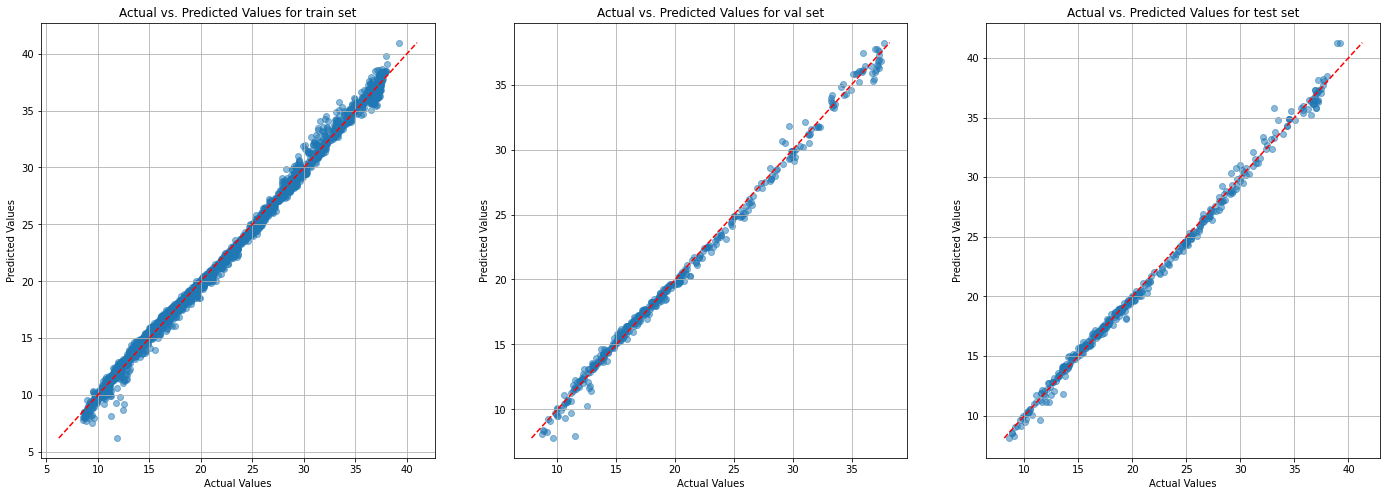

In [177]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

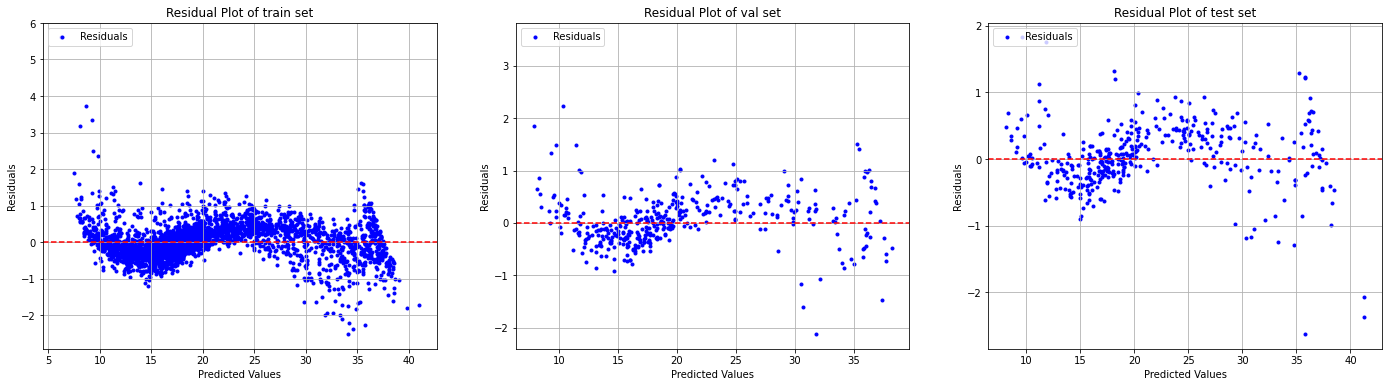

In [178]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


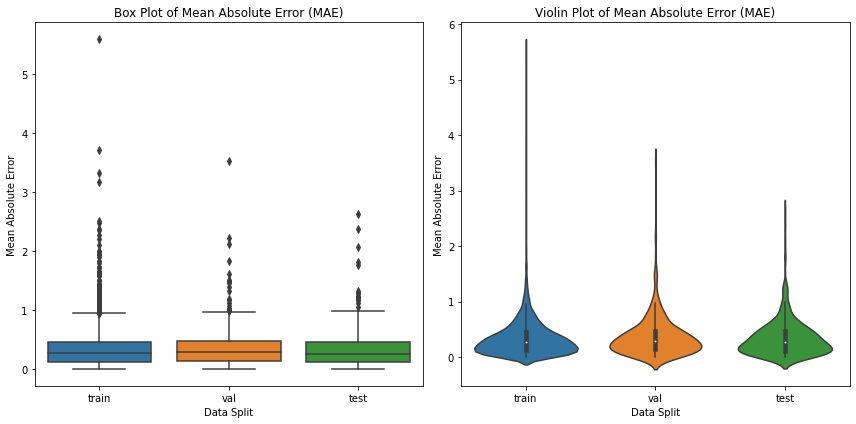

In [179]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])
    
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1) 
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE)')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)  
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE)')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

## Shap Analysis

In [180]:
# features_train
train_feature_500 = shap.utils.sample(features_train, 2500) 

In [181]:
labels_set[2].sum()/400

21.41736175

In [182]:
train_feature_500.shape

(2500, 35)

### For all test data

In [183]:
LR_model = models['Linear Regression']
explainer = shap.Explainer(LR_model.predict, train_feature_500)
shap_values = explainer(features_test)

In [184]:
features_test.shape

(400, 35)

In [185]:
predictions_list['test'][0] # predicted value

array([19.32481079])

In [186]:
labels_test[0] #original labels

array([19.7274])

In [187]:
set_d

['train', 'val', 'test']

In [188]:
test_residu = []
for i in range(labels_test.shape[0]):
    test_residu.append((labels_test[i] - predictions_list['test'][i])[0])

In [189]:
test_residu_np = np.array(test_residu)

In [190]:
test_residu_np.shape

(400,)

In [191]:
test_residu_np_abs = np.abs(test_residu_np)

In [192]:
test_residu_np

array([ 4.02589214e-01,  2.07033739e-03, -1.52979205e-01, -2.16498246e-01,
        1.97206141e-01,  3.71813960e-01,  2.29536017e-01, -2.71146971e-01,
        1.77400306e-01,  5.55502822e-02, -5.18736589e-02, -2.14180926e-01,
        1.46556588e-01,  9.13771175e-01,  5.84755395e-01,  4.88634125e-01,
        2.16567355e-01,  1.49538241e-01,  3.07203010e-01, -1.58930569e-01,
        4.98960325e-01,  5.42166521e-02, -2.15035675e-01, -1.26486281e-01,
       -2.41091763e-01, -5.63453543e-01,  4.98371729e-01,  4.71724625e-01,
        3.93060100e-01,  2.51863480e-01,  7.29630110e-01, -9.11495266e-01,
       -1.25520735e-03,  5.12131591e-01,  7.92602048e-02,  1.85265405e-01,
        4.65259272e-01,  5.67932553e-01, -3.52255641e-01, -6.72563306e-02,
        7.02806739e-01, -1.48072240e-01, -3.39754473e-01, -7.11827079e-01,
       -2.81419464e-03, -6.62613960e-01,  4.00327031e-02,  1.11939143e+00,
       -4.73133642e-01,  3.84546387e-01, -1.05642479e+00, -5.09944269e-01,
       -8.51719485e-02, -

In [193]:
test_residu_np_abs.sum()/400 #sanity test to check if we get the MAE loss correctly

0.35040973049390556

In [194]:
sorted_indices = np.argsort(test_residu_np_abs)
print(sorted_indices[:10])

[128  32   1  44  95 197 380  85 102 239]


In [195]:
len(sorted_indices) #numbe of test samples
samples_ = (labels_test.shape[0]*10)//100 # number of samples for 10%
worst_set_ind = sorted_indices[-1*samples_:] # worst 10% - when ascending order based sorted, highest values are in the right side
best_set_ind = sorted_indices[:samples_] # best 10% - when ascending order based sorted, smallest values are to the left

#we need the corrosponding shap values
best_10 = shap_values[best_set_ind]
worst_10 = shap_values[worst_set_ind]

In [196]:
best_10.shape

(40, 35)

In [197]:
best_10_values = test_residu_np[list(best_set_ind)] #best 10% of residual values - closest to zero
worst_10_values = test_residu_np[list(worst_set_ind)] #worst 10% of residual values - furthest from zero

In [198]:
best_10_values

array([-0.00102516, -0.00125521,  0.00207034, -0.00281419, -0.00368199,
        0.00749668,  0.00769714,  0.00771863,  0.0088104 , -0.00993512,
       -0.01009305,  0.01219684, -0.01334988,  0.01515509, -0.01594578,
       -0.01658455,  0.01667068, -0.01728964,  0.01750693,  0.01835578,
        0.02135729,  0.02214325,  0.02663578, -0.02717272, -0.0272397 ,
        0.03158667,  0.03249112,  0.03569538, -0.03657377, -0.03684485,
       -0.03809496, -0.03830384, -0.03897749, -0.03951709,  0.0400327 ,
       -0.0413694 ,  0.04206567, -0.04218494, -0.04526091,  0.04760998])

In [199]:
worst_10_values

array([ 0.70280674,  0.70430759, -0.71182708,  0.71671986,  0.72963011,
       -0.73260436,  0.74519648,  0.76701633,  0.80406983,  0.84032499,
       -0.8550067 , -0.85608371, -0.86431159,  0.87639161,  0.87656079,
        0.88672097, -0.89544404, -0.91149527,  0.91377117,  0.92409396,
        0.92556469, -0.98349664,  0.98517457, -0.9953462 , -1.05642479,
        1.11939143, -1.17689597, -1.1812259 ,  1.20145762,  1.21827195,
        1.23245143, -1.24305807,  1.28670225, -1.29544891,  1.32125352,
        1.76028389,  1.82606004, -2.06993137, -2.37194882, -2.62962039])

In [200]:
best_status = {'all_p':None, 'all_n':None,'all_p_n':None}

test_residu_np_abs + test_residu_np


for value in best_10_values:
#     print(value)
    if value >= 0:
        

IndentationError: expected an indented block (1787333777.py, line 9)

In [ ]:
worst_status = {'all_p':None, 'all_n':None,'all_p_n':None}



In [201]:
custom_feature_names = cols
shap_values.feature_names = cols
best_10.feature_names = cols
worst_10.feature_names = cols

### Best 10% samples of test set

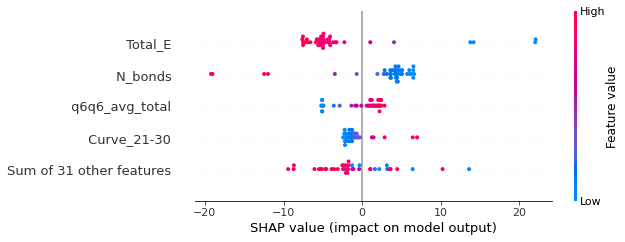

In [202]:
shap.plots.beeswarm(best_10,max_display=5)

### Worst 10% samples of test set

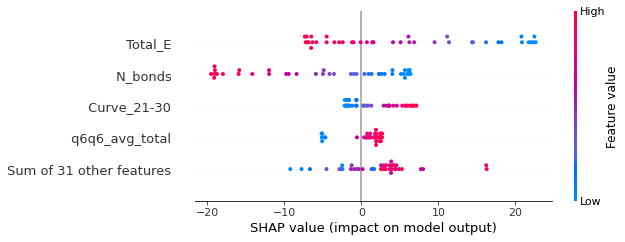

In [203]:
shap.plots.beeswarm(worst_10,max_display=5)

In [56]:
shap_values[1]
# .values are SHAP values for all corrosponding features
# base values are the average value i guess E(x)
#data is actual feature values for the sample

.values =
array([-4.02970255e-02, -1.67887770e-01, -2.52388437e-02,  7.95127989e-01,
       -6.72519732e-02,  9.47031758e-01, -8.08919574e-03,  2.19748741e-02,
        1.20946607e+00, -1.84570295e+00, -2.19234582e+00, -6.97631570e-01,
       -1.03613461e-01,  5.76533149e-02, -2.93932661e-02, -3.55054753e-03,
       -1.23014909e-01,  3.08503765e-01, -9.13591172e-02, -4.35523885e+00,
       -4.91542178e-01,  2.45532975e-01, -2.89690201e-01, -1.09894889e-01,
       -2.68327718e-03,  3.87263545e+00,  1.39048701e-01,  4.51385823e-01,
        6.09663076e-03,  5.40114077e-03,  1.82806635e-03,  5.93644499e-02,
        2.42731635e+00, -1.41222325e+00, -1.26129759e+00])

.base_values =
array([21.21640899])

.data =
array([7.14285714e-02, 0.00000000e+00, 1.00000000e+00, 1.13025210e-01,
       0.00000000e+00, 1.97670049e-01, 4.89017820e-02, 0.00000000e+00,
       1.98624905e-01, 8.36120401e-04, 4.18027433e-02, 3.75807399e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 

### For full test set

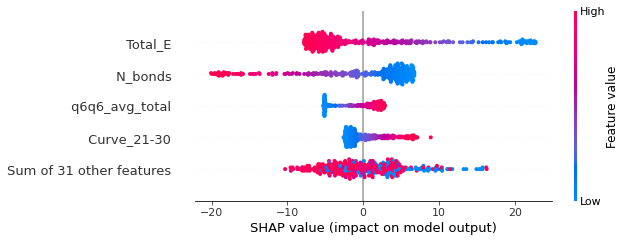

In [204]:
shap.plots.beeswarm(shap_values,max_display=5)

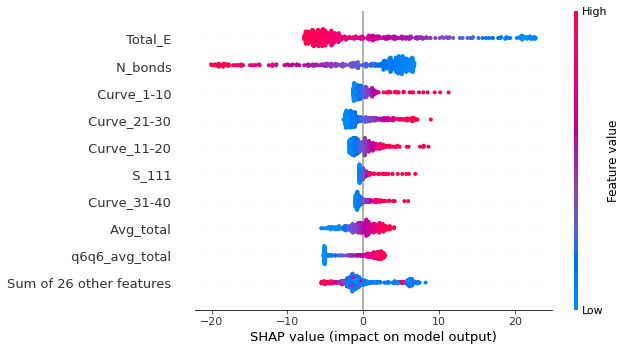

In [205]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))


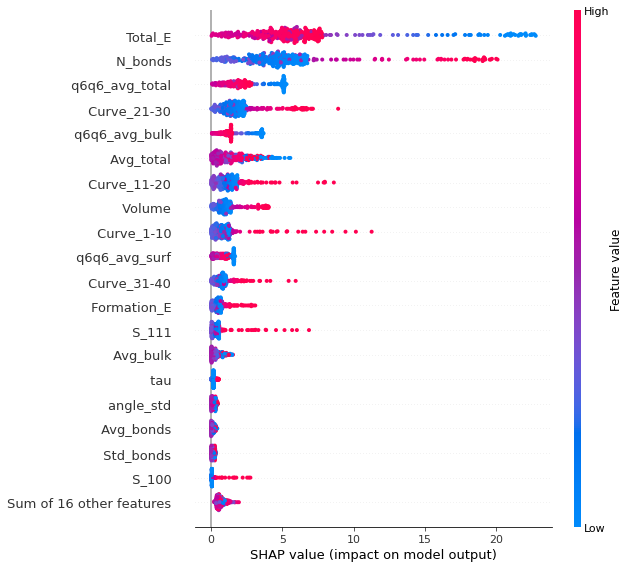

In [206]:
shap.plots.beeswarm(shap_values.abs,max_display=20)


## Dataframe

In [207]:
#dataset splits as dataframes
df_train = pd.DataFrame(features_train, columns=[ f'feature_{i}' for i in range(35)])
df_validation = pd.DataFrame(features_validation, columns=[ f'feature_{i}' for i in range(35)])
df_test = pd.DataFrame(features_test, columns=[ f'feature_{i}' for i in range(35)])
df_splits_sets =  {'train':df_train,'test':df_test,'val':df_validation}

## Analysis based on temperature values


In [208]:
#temperature values - mapped to original
train_temp_vals = list(np.sort(df_train['feature_0'].unique()) )
print(train_temp_vals)
original_temp_vals = [273.0, 303.0, 323.0, 373.0, 423.0, 473.0, 523.0, 573.0, 623.0, 673.0, 723.0, 773.0, 823.0, 873.0, 923.0, 973.0]
print(original_temp_vals)

[0.0, 0.042857142857142816, 0.0714285714285714, 0.1428571428571428, 0.2142857142857143, 0.2857142857142857, 0.3571428571428571, 0.4285714285714286, 0.5, 0.5714285714285714, 0.6428571428571429, 0.7142857142857143, 0.7857142857142857, 0.8571428571428571, 0.9285714285714285, 0.9999999999999999]
[273.0, 303.0, 323.0, 373.0, 423.0, 473.0, 523.0, 573.0, 623.0, 673.0, 723.0, 773.0, 823.0, 873.0, 923.0, 973.0]


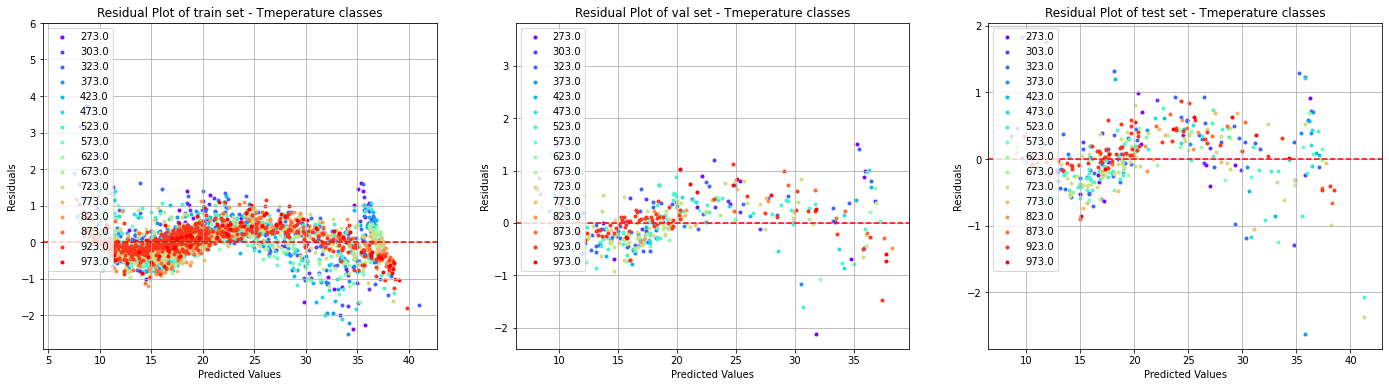

In [209]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

colors = plt.cm.rainbow(np.linspace(0, 1, len(train_temp_vals)))

ttt = []
for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
#     plt.figure(figsize=(8, 6))
    for indx,t_val in enumerate(train_temp_vals):
        samples = df_splits_sets[set_d[i]]['feature_0'] == t_val
        ttt.append(samples)
        label_ = original_temp_vals[train_temp_vals.index(t_val)]
        axs[i].scatter(predictions_list[set_d[i]][samples,0], residuals[samples], color=colors[indx], marker='.', label=label_)
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Tmeperature classes')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

In [63]:
#sanity check - checks if all samples were selected in previous plots
len(ttt[0])
a=0
for i in range(16):
    ttmp = ttt[i]
    for val in ttmp:
        if val ==True:
            a+=1
print(a)

3199


## Analysis based on time (time correlates with number of atoms bulk and surface)

In [64]:
#temperature values - mapped to original
train_time_vals = list(np.sort(df_train['feature_2'].unique()))
print(train_time_vals)
original_time_vals = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
print(original_time_vals)

[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444445, 0.5555555555555556, 0.6666666666666665, 0.7777777777777777, 0.8888888888888888, 1.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


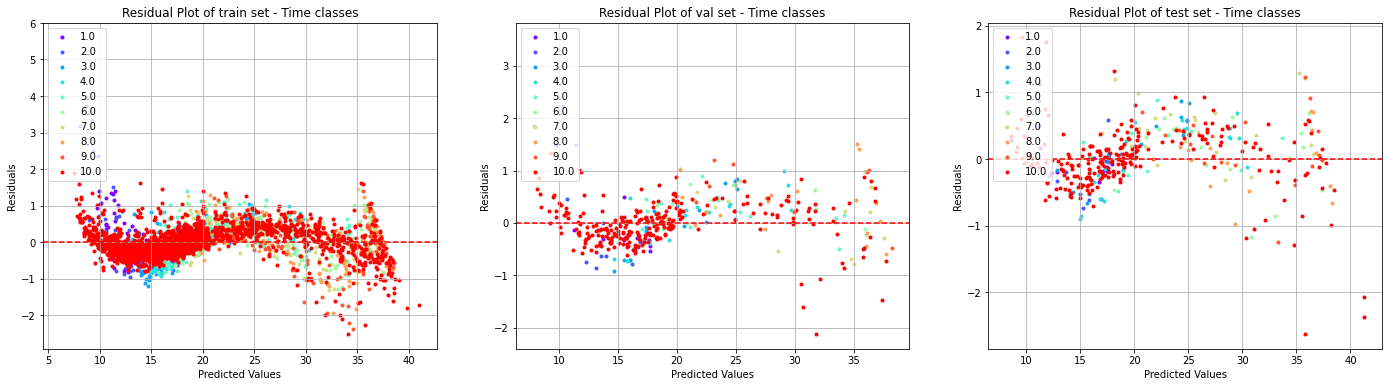

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

colors = plt.cm.rainbow(np.linspace(0, 1, len(train_time_vals)))

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
    for indx,t_val in enumerate(train_time_vals):
        samples = df_splits_sets[set_d[i]]['feature_2'] == t_val
        label_ = original_time_vals[train_time_vals.index(t_val)]
        axs[i].scatter(predictions_list[set_d[i]][samples,0], residuals[samples], color=colors[indx], marker='.', label=label_)
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Time classes')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

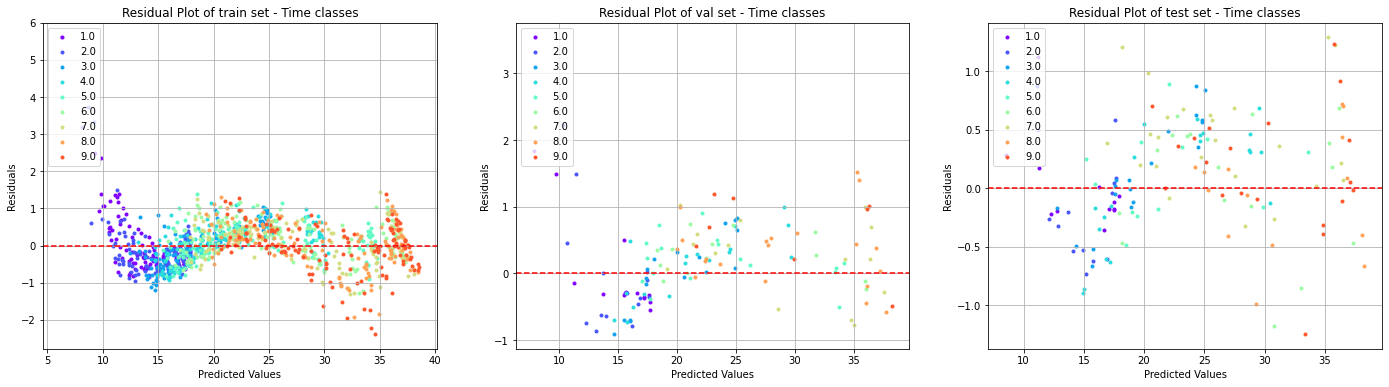

In [66]:
# without the time=10 samples ; most of these samples (not all) are in unexplained subset
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

colors = plt.cm.rainbow(np.linspace(0, 1, len(train_time_vals)))

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
    for indx,t_val in enumerate(train_time_vals[:-1]): # can change this value!!
        samples = df_splits_sets[set_d[i]]['feature_2'] == t_val
        label_ = original_time_vals[train_time_vals.index(t_val)]
        axs[i].scatter(predictions_list[set_d[i]][samples,0], residuals[samples], color=colors[indx], marker='.', label=label_)
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Time classes')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

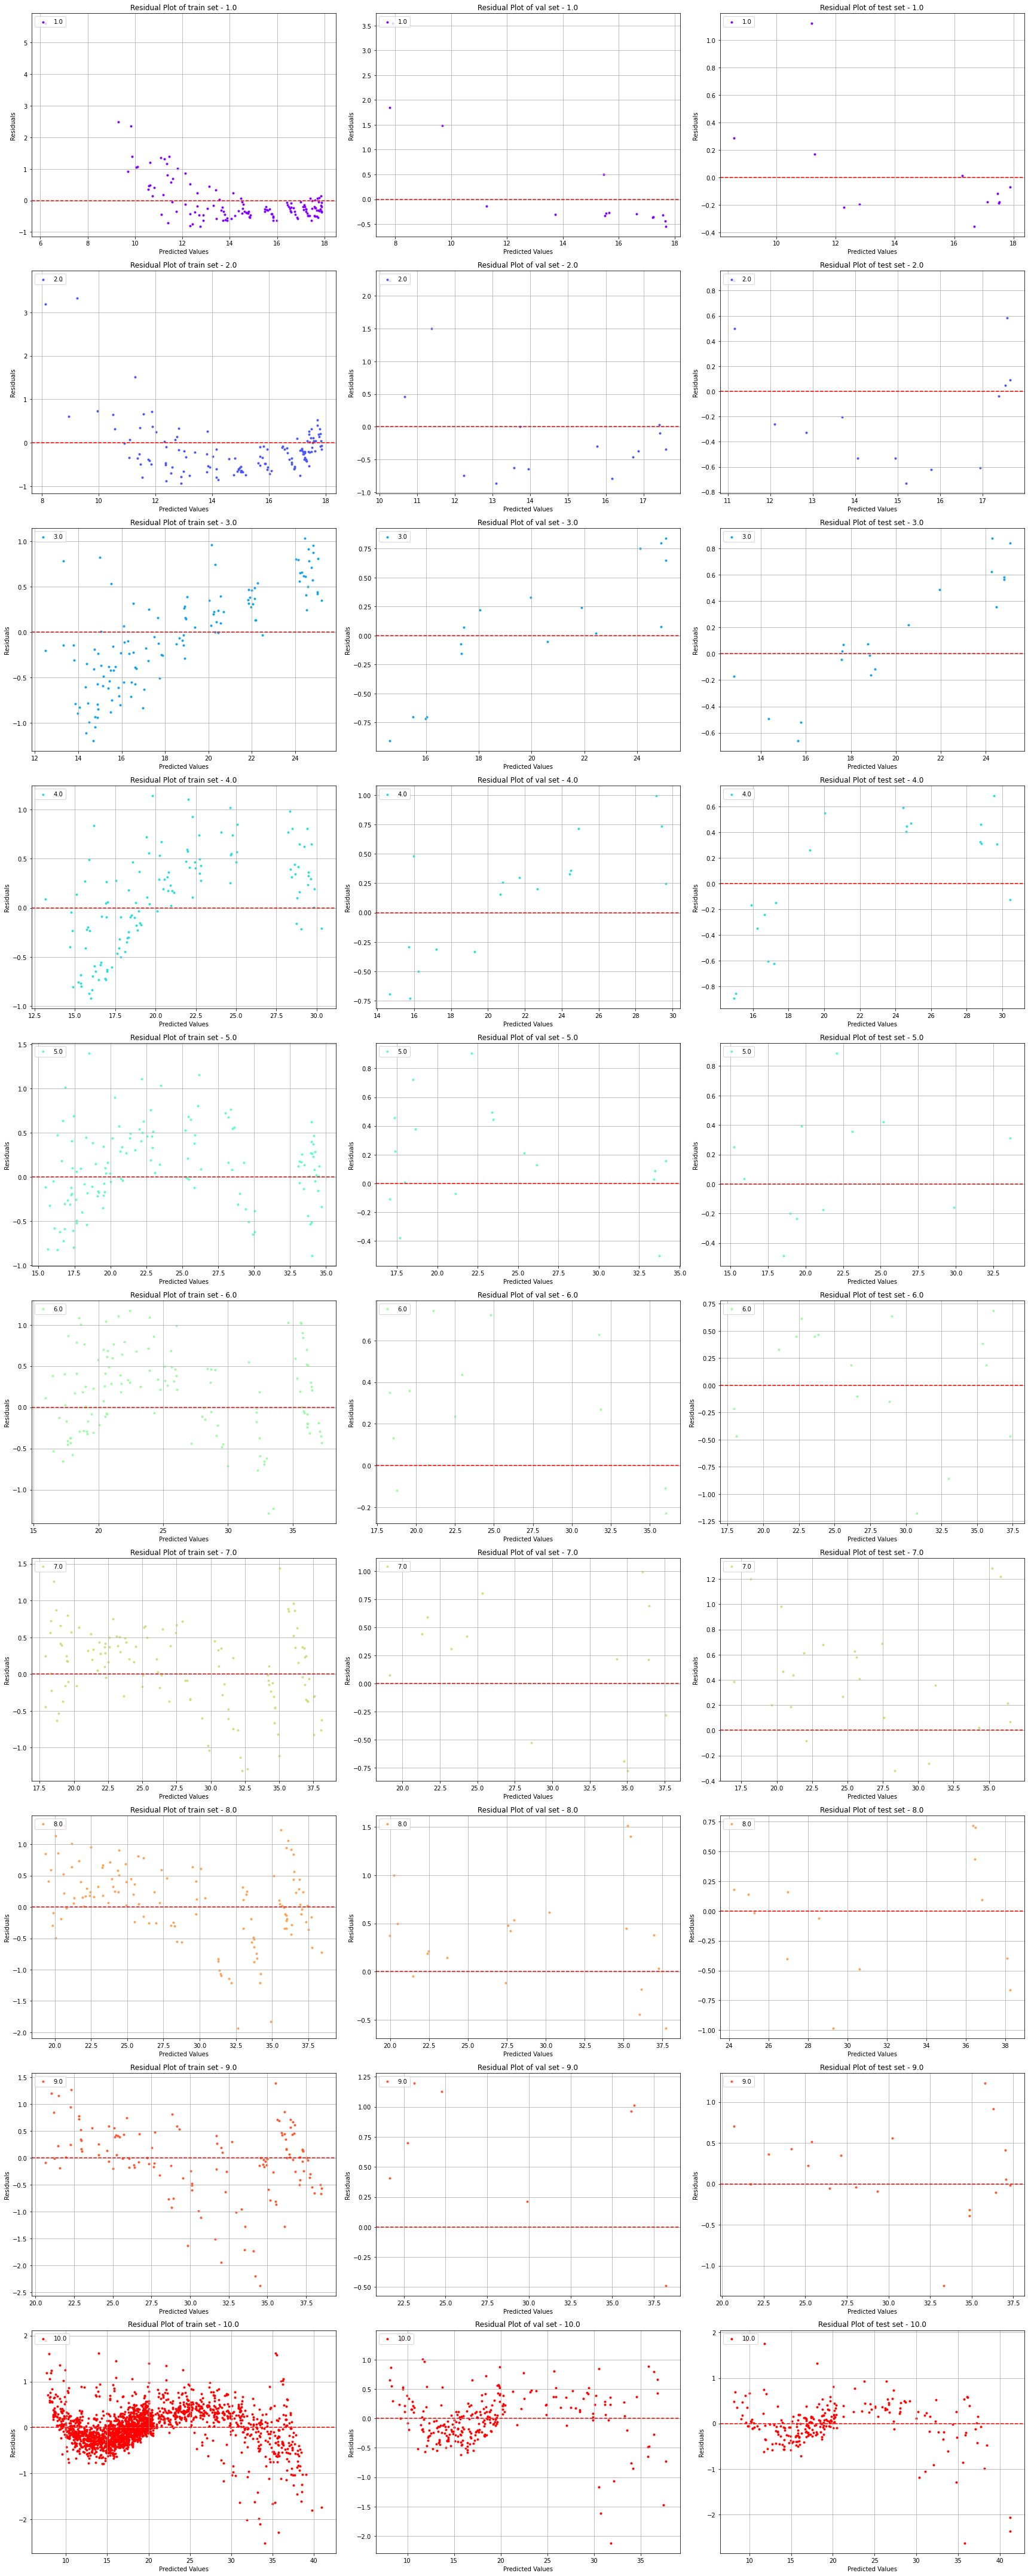

In [67]:
#not so useful - code from chatgpt so not sure if it is correct!! check again

fig, axs = plt.subplots(len(train_time_vals), 3, figsize=(24, 6 * len(train_time_vals)))  # 10 rows for each 'train_time_vals', 3 columns

colors = plt.cm.rainbow(np.linspace(0, 1, len(train_time_vals)))

for i in range(3):  # Loop over the 3 sets (train, test, val)
    for j, t_val in enumerate(train_time_vals):  # Loop over each 'train_time_vals'
        samples = df_splits_sets[set_d[i]]['feature_2'] == t_val
        residuals = labels_set[i][samples] - predictions_list[set_d[i]][samples].squeeze()
        label_ = original_time_vals[train_time_vals.index(t_val)]
        
        # Plotting in row 'j' for the current set 'i'
        axs[j, i].scatter(predictions_list[set_d[i]][samples, 0], residuals, color=colors[j], marker='.', label=label_)
        axs[j, i].axhline(y=0, color='red', linestyle='--')
        axs[j, i].set_xlabel('Predicted Values')
        axs[j, i].set_ylabel('Residuals')
        axs[j, i].set_title(f'Residual Plot of {set_d[i]} set - {label_}')
        axs[j, i].legend(loc='upper left')
        axs[j, i].grid(True)

plt.tight_layout()
plt.show()


## Analysis based on growth rate

In [68]:
#growth rate values - mapped to original
train_gr_vals = list(np.sort(df_train['feature_1'].unique()) )
print(train_gr_vals)
original_gr_vals = [2.5e-05, 5e-05, 7.5e-05, 0.0001, 0.000125, 0.00015, 0.000175, 0.0002, 0.000225, 0.00025, 0.0]
print(original_gr_vals)# these 2 may be on the opposing order!! check later!!

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[2.5e-05, 5e-05, 7.5e-05, 0.0001, 0.000125, 0.00015, 0.000175, 0.0002, 0.000225, 0.00025, 0.0]


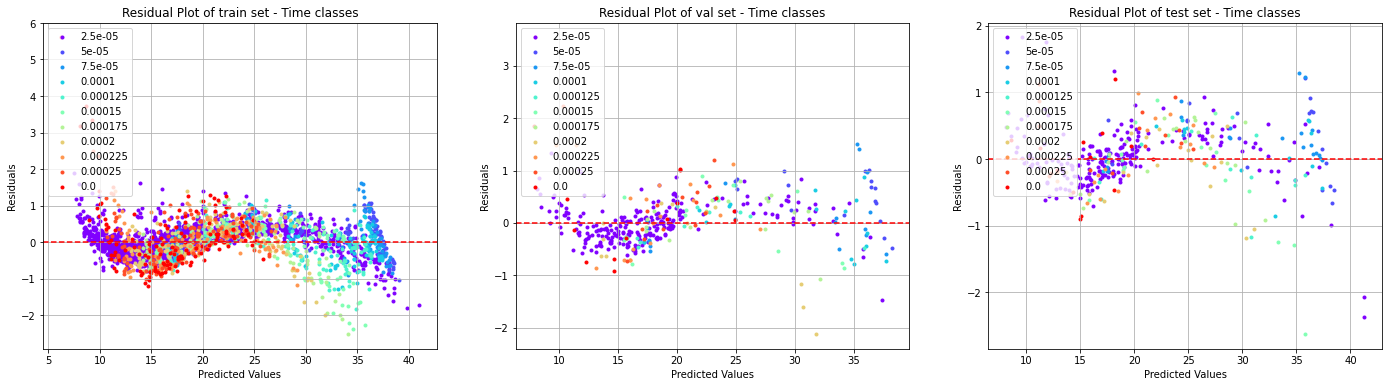

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

colors = plt.cm.rainbow(np.linspace(0, 1, len(train_gr_vals)))

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
    for indx,t_val in enumerate(train_gr_vals):
        samples = df_splits_sets[set_d[i]]['feature_1'] == t_val
        label_ = original_gr_vals[train_gr_vals.index(t_val)]
        axs[i].scatter(predictions_list[set_d[i]][samples,0], residuals[samples], color=colors[indx], marker='.', label=label_)
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Time classes')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()
# labels are in the opposing order i think - 2.5e-5 should be 0 etc.

## Ridge Regression

Ridge regression - L2 norm <br>
makes the weights close to zero
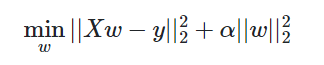

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation

ridge = Ridge()

param_grid = {'alpha': np.logspace(-20, 20, 500)} #for 500 finally

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [211]:
grid_search

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-20, 1.20270833e-20, 1.44650734e-20, 1.73972643e-20,
       2.09238348e-20, 2.51652705e-20, 3.02664806e-20, 3.64017485e-20,
       4.37806863e-20, 5.26553963e-20, 6.33290840e-20, 7.61664172e-20,
       9.16059848e-20, 1.10175281e-19, 1.32508729e-19, 1.59369353e-19,
       1.91674849e-19, 2.30528939e-19, 2.77259076e-19, 3....
       1.43321923e+18, 1.72374471e+18, 2.07316213e+18, 2.49340937e+18,
       2.99884423e+18, 3.60673495e+18, 4.33785019e+18, 5.21716858e+18,
       6.27473213e+18, 7.54667263e+18, 9.07644607e+18, 1.09163173e+19,
       1.31291459e+19, 1.57905331e+19, 1.89914058e+19, 2.28411221e+19,
       2.74712079e+19, 3.30398507e+19, 3.97373038e+19, 4.77923865e+19,
       5.74803016e+19, 6.91320378e+19, 8.31456781e+19, 1.00000000e+20])},
             scoring='neg_mean_squared_error')

In [212]:
param_grid['alpha']

array([1.00000000e-20, 1.20270833e-20, 1.44650734e-20, 1.73972643e-20,
       2.09238348e-20, 2.51652705e-20, 3.02664806e-20, 3.64017485e-20,
       4.37806863e-20, 5.26553963e-20, 6.33290840e-20, 7.61664172e-20,
       9.16059848e-20, 1.10175281e-19, 1.32508729e-19, 1.59369353e-19,
       1.91674849e-19, 2.30528939e-19, 2.77259076e-19, 3.33461802e-19,
       4.01057288e-19, 4.82354943e-19, 5.80132310e-19, 6.97729965e-19,
       8.39165644e-19, 1.00927151e-18, 1.21385926e-18, 1.45991865e-18,
       1.75585633e-18, 2.11178304e-18, 2.53985907e-18, 3.05470967e-18,
       3.67392478e-18, 4.41865996e-18, 5.31435916e-18, 6.39162405e-18,
       7.68725952e-18, 9.24553110e-18, 1.11196773e-17, 1.33737286e-17,
       1.60846948e-17, 1.93451965e-17, 2.32666291e-17, 2.79829688e-17,
       3.36553498e-17, 4.04775697e-17, 4.86827104e-17, 5.85511016e-17,
       7.04198979e-17, 8.46945981e-17, 1.01862899e-16, 1.22511358e-16,
       1.47345431e-16, 1.77213578e-16, 2.13136247e-16, 2.56340741e-16,
      

In [213]:
predictions_list = {'train':None,'test':None,'val':None}

training_start = time.time()
grid_search.fit(features_train, labels_train)
training_end = time.time()

best_params = grid_search.best_params_
print("Best parameters: ", best_params)

best_ridge = grid_search.best_estimator_ # returns the best model with the best hyper-parameters

val_start = time.time()
y_pred_validation = best_ridge.predict(features_validation)
val_end = time.time()
predictions_list['val'] = y_pred_validation

y_pred_train = best_ridge.predict(features_train)
predictions_list['train'] = y_pred_train

test_start = time.time()
y_pred_test = best_ridge.predict(features_test)
test_end = time.time()
predictions_list['test'] = y_pred_test

#metrics for train, test and validation
val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val']) 
val_r2 = r2_score(labels_validation, predictions_list['val'])
print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} ,MAPD: {val_mapd:.8f}, R^2: {val_r2:.10f}")

train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
train_mae = mean_absolute_error(labels_train, predictions_list['train'])
train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train'])
train_r2 = r2_score(labels_train, predictions_list['train'])
print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f},MAPD: {train_mapd:.8f}, R^2: {train_r2:.10f}")

test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
test_mae = mean_absolute_error(labels_test, predictions_list['test'])
val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val'])
test_r2 = r2_score(labels_test, predictions_list['test'])
print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f},MAPD: {test_mapd:.8f}, R^2: {test_r2:.10f}")

print("Time taken for training: {:.10f} seconds".format(training_end - training_start)) 
print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))
print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))


Best parameters:  {'alpha': 0.00032585624761532296}
Validation set with Linear Regression - RMSE: 0.5198358867, MSE: 0.2702293491, MAE: 0.3730886641 ,MAPD: 2.06499799, R^2: 0.9951374816
Train set with Linear Regression - RMSE: 0.4775568556, MSE: 0.2280605503, MAE: 0.3456587349,MAPD: 1.84534905, R^2: 0.9960522331
Test set with Linear Regression - RMSE: 0.4863604676, MSE: 0.2365465045, MAE: 0.3499577126,MAPD: 1.75046855, R^2: 0.9960958979
Time taken for training: 4.8295972347 seconds
Time taken for testing: 0.0000000000 seconds
Time taken for validation: 0.0000000000 seconds


In [214]:
best_ridge

Ridge(alpha=0.00032585624761532296)

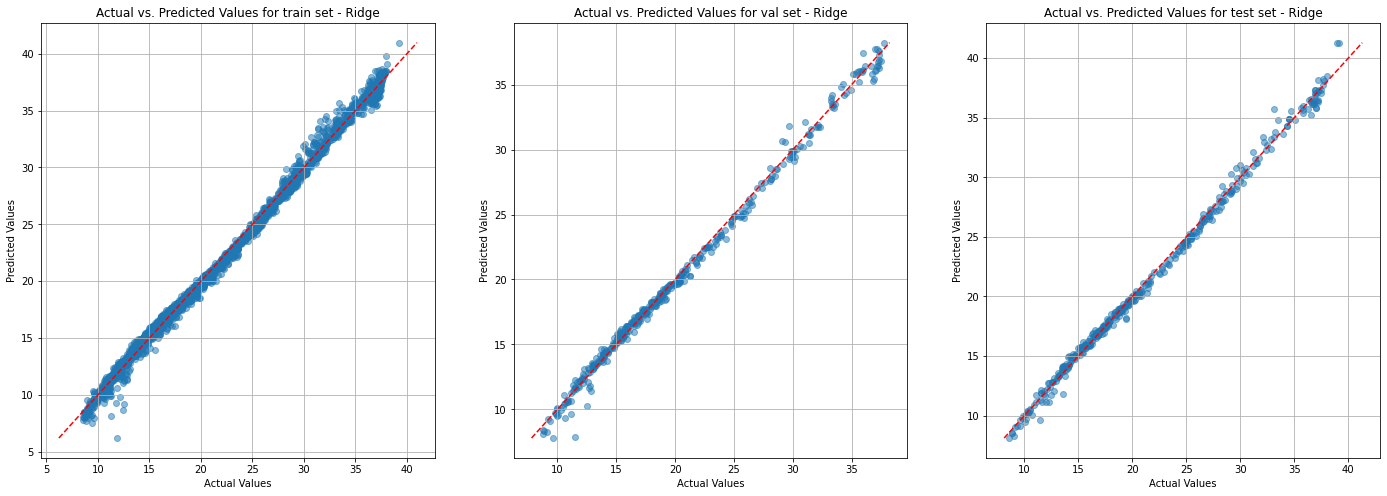

In [215]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set - Ridge")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

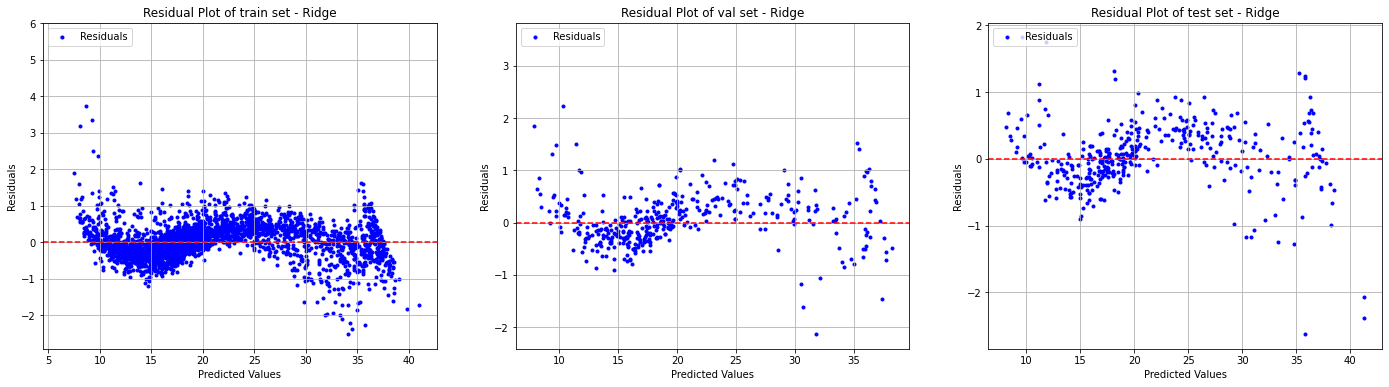

In [216]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Ridge')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


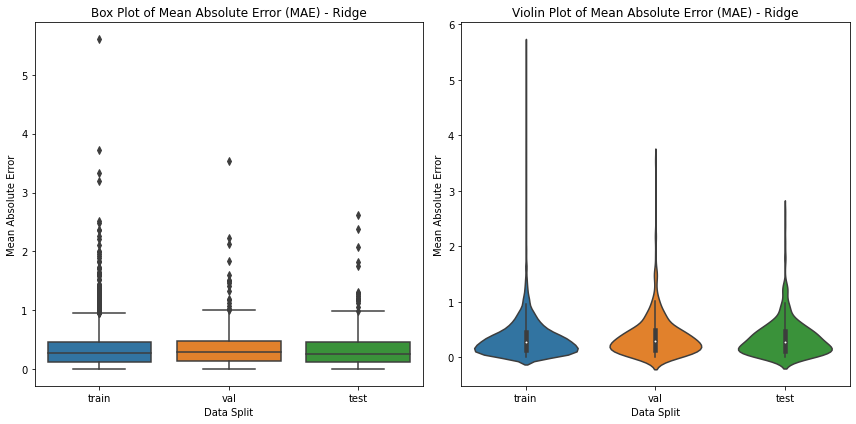

In [217]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])
    
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1) 
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)  
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

In [218]:
# features_train
train_feature_500 = shap.utils.sample(features_train, 2500) 

LR_ridge_model = best_ridge
explainer_r = shap.Explainer(LR_ridge_model.predict, train_feature_500)
shap_values_ridge = explainer_r(features_test)


In [219]:
shap_values_ridge.shape

(400, 35)

In [220]:
test_residu_ridge = []
for i in range(labels_test.shape[0]):
    test_residu_ridge.append((labels_test[i] - predictions_list['test'][i])[0])

In [221]:
test_residu_ridge_np = np.array(test_residu_ridge)
test_residu_ridge_np_abs = np.abs(test_residu_ridge_np)
test_residu_ridge_np_abs.sum()/400 #sanity test to check if we get the MAE loss correctly

0.34995771264476067

In [222]:
sorted_indices = np.argsort(test_residu_ridge_np_abs)
print(sorted_indices[:10])

len(sorted_indices) #numbe of test samples
samples_ = (labels_test.shape[0]*10)//100 # number of samples for 10%
worst_set_ind = sorted_indices[-1*samples_:] # worst 10% - when ascending order based sorted, highest values are in the right side
best_set_ind = sorted_indices[:samples_] # best 10% - when ascending order based sorted, smallest values are to the left

[128 273  95  44 197   1  32 218 239  85]


In [223]:
#we need the corrosponding shap values
best_10 = shap_values_ridge[best_set_ind]
worst_10 = shap_values_ridge[worst_set_ind]

In [224]:
custom_feature_names = cols
shap_values_ridge.feature_names = cols
best_10.feature_names = cols
worst_10.feature_names = cols

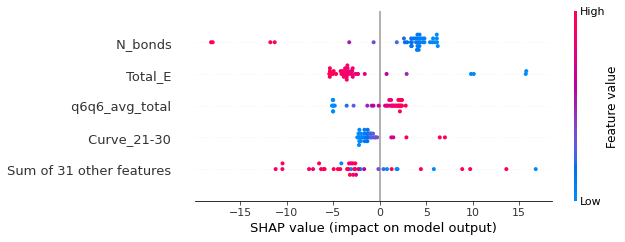

In [225]:
shap.plots.beeswarm(best_10,max_display=5)

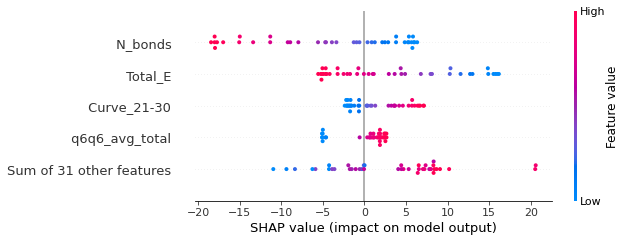

In [226]:
shap.plots.beeswarm(worst_10,max_display=5)


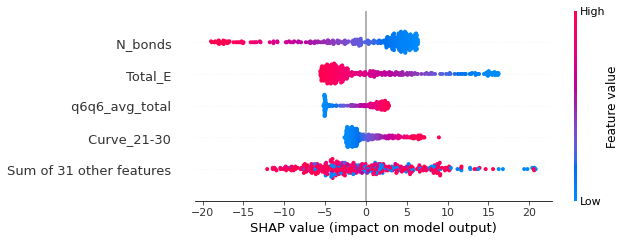

In [227]:
shap.plots.beeswarm(shap_values_ridge,max_display=5)


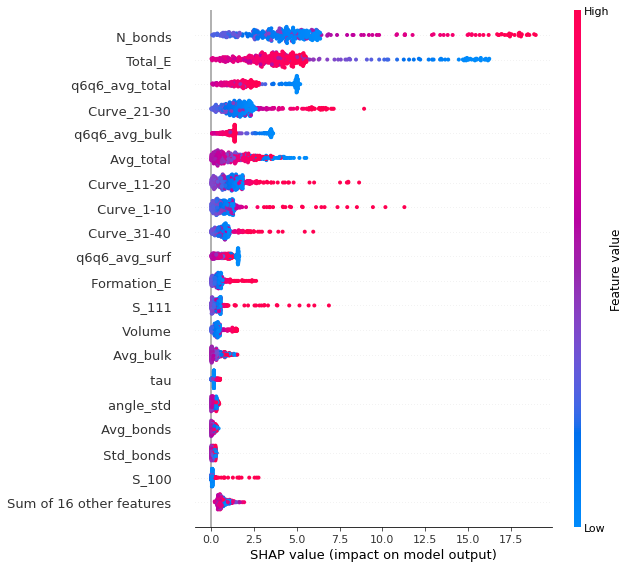

In [228]:
shap.plots.beeswarm(shap_values_ridge.abs,max_display=20)


## LASSO Regression

LASSO - L1 norm <br>
Makes the weights sparse

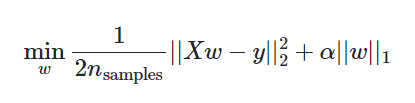

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation

lasso = Lasso()

param_grid = {'alpha': np.logspace(-20, 20, 50)} 

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [230]:
predictions_list = {'train':None,'test':None,'val':None}

training_start = time.time()
grid_search.fit(features_train, labels_train)
training_end = time.time()

best_params = grid_search.best_params_
print("Best parameters: ", best_params)

best_lasso = grid_search.best_estimator_ # returns the best model with the best hyper-parameters

val_start = time.time()
y_pred_validation = best_lasso.predict(features_validation)
val_end = time.time()
predictions_list['val'] = y_pred_validation

y_pred_train = best_lasso.predict(features_train)
predictions_list['train'] = y_pred_train

test_start = time.time()
y_pred_test = best_lasso.predict(features_test)
test_end = time.time()
predictions_list['test'] = y_pred_test


#metrics for train, test and validation
val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val'])
val_r2 = r2_score(labels_validation, predictions_list['val'])
print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} , MAPD:{val_mapd:.8f} , R^2: {val_r2:.10f}")

train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
train_mae = mean_absolute_error(labels_train, predictions_list['train'])
train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train'])
train_r2 = r2_score(labels_train, predictions_list['train'])
print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f},MAPD:{train_mapd:.8f} , R^2: {train_r2:.10f}")

test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
test_mae = mean_absolute_error(labels_test, predictions_list['test'])
test_mapd = calc_MAPE_Percentage(labels_test,predictions_list['test'])
test_r2 = r2_score(labels_test, predictions_list['test'])
print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f},MAPD:{test_mapd:.8f} , R^2: {test_r2:.10f}")

print("Time taken for training: {:.10f} seconds".format(training_end - training_start)) 
print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))
print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ", mse)
# r2 = r2_score(y_test, y_pred)
# print("R^2 value: ", r2)

# print("Time taken for training and hyper-parameter tuning: {:.2f} seconds".format(training_end - training_start))
# print("Time taken for testing: {:.2f} seconds".format(testing_end - testing_start))

Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.5437043987348, tolerance: 14.742803755341527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 300.38378896415617, tolerance: 14.92628627096364
Objective did not converge. You might want to increase the number of iterations. Duality gap: 304.16755604725995, tolerance: 14.854443867859729
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.2078284786049, tolerance: 14.87454703455098
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.2454953627796, tolerance: 14.517933941155492
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.5437043987335, tolerance: 14.742803755341527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 300.38378896415634, tolerance: 14.92628627096364

Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.54354252381773, tolerance: 14.742803755341527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 300.3835764210314, tolerance: 14.92628627096364
Objective did not converge. You might want to increase the number of iterations. Duality gap: 304.1673989237595, tolerance: 14.854443867859729
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.20763967718557, tolerance: 14.87454703455098
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.2453416647027, tolerance: 14.517933941155492
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.54264391139117, tolerance: 14.742803755341527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 300.38239653588556, tolerance: 14.9262862709636

Best parameters:  {'alpha': 3.2374575428176535e-05}
Validation set with Linear Regression - RMSE: 0.5245955027, MSE: 0.2752004415, MAE: 0.3721285322 , MAPD:2.05595986 , R^2: 0.9950480316
Train set with Linear Regression - RMSE: 0.4803879912, MSE: 0.2307726221, MAE: 0.3463467949,MAPD:1.85072347 , R^2: 0.9960052867
Test set with Linear Regression - RMSE: 0.4845639328, MSE: 0.2348022050, MAE: 0.3480981568,MAPD:1.73843614 , R^2: 0.9961246868
Time taken for training: 7.0268838406 seconds
Time taken for testing: 0.0000000000 seconds
Time taken for validation: 0.0010001659 seconds


Objective did not converge. You might want to increase the number of iterations. Duality gap: 274.2889028317667, tolerance: 18.480465414243948


In [142]:
len(predictions_list['val'].shape)

1

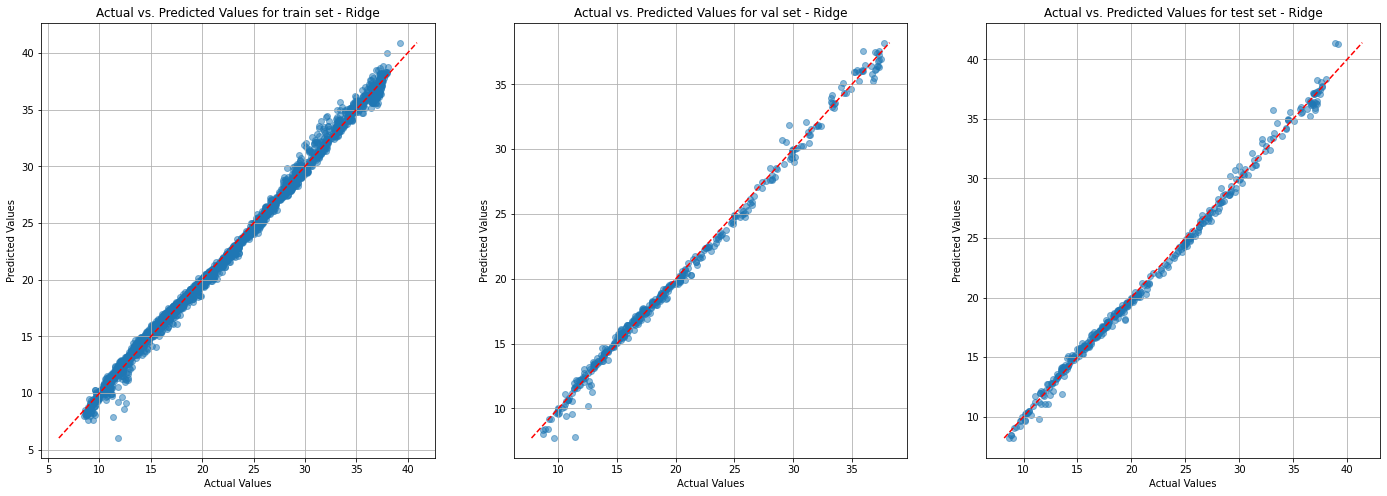

In [231]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set - Ridge")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

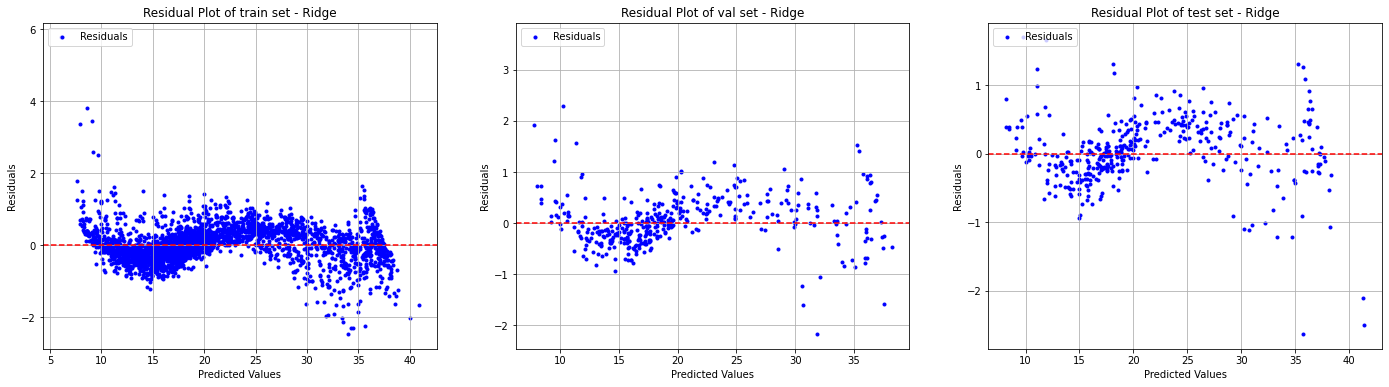

In [232]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Ridge')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


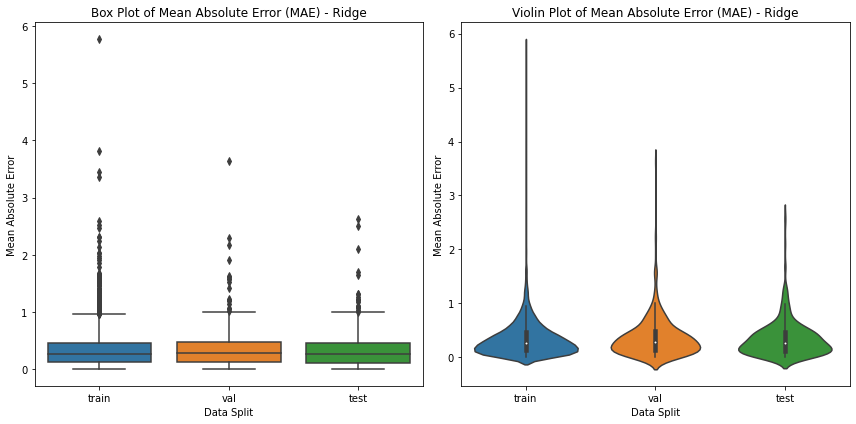

In [233]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])
    
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1) 
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)  
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

In [234]:
# features_train
train_feature_500 = shap.utils.sample(features_train, 2500) 

LR_lasso_model = best_lasso
explainer = shap.Explainer(LR_lasso_model.predict, train_feature_500)
shap_values = explainer(features_test)

In [1]:
test_residu = []
for i in range(labels_test.shape[0]):
    test_residu.append((labels_test[i] - predictions_list['test'][i])[0])

NameError: name 'labels_test' is not defined

In [236]:
test_residu_np = np.array(test_residu)

test_residu_np_abs = np.abs(test_residu_np)

test_residu_np_abs.sum()/400 #sanity test to check if we get the MAE loss correctly

0.34809815680738054

In [237]:
sorted_indices = np.argsort(test_residu_np_abs)
print(sorted_indices[:10])

[229  46  44 343 163 128 312  71 373 316]


In [238]:
len(sorted_indices) #numbe of test samples
samples_ = (labels_test.shape[0]*10)//100 # number of samples for 10%
worst_set_ind = sorted_indices[-1*samples_:] # worst 10% - when ascending order based sorted, highest values are in the right side
best_set_ind = sorted_indices[:samples_] # best 10% - when ascending order based sorted, smallest values are to the left

#we need the corrosponding shap values
best_10 = shap_values[best_set_ind]
worst_10 = shap_values[worst_set_ind]

In [246]:
custom_feature_names = cols
shap_values.feature_names = cols
best_10.feature_names = cols
# worst_10.feature_names = cols

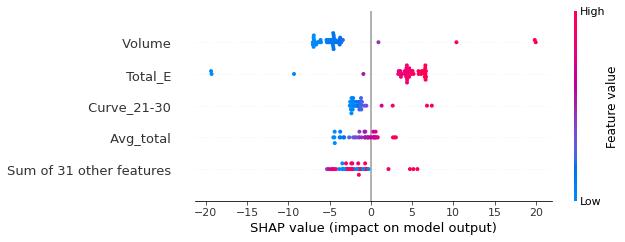

In [247]:
shap.plots.beeswarm(best_10,max_display=5)

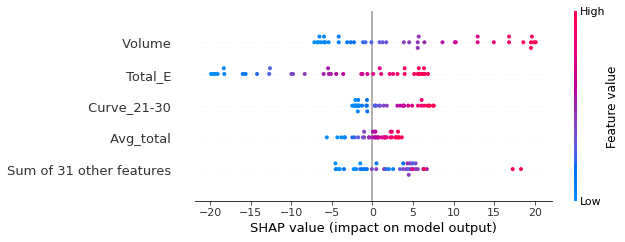

In [248]:
shap.plots.beeswarm(worst_10,max_display=5)

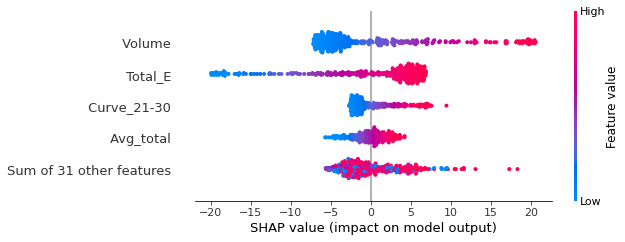

In [249]:

shap.plots.beeswarm(shap_values,max_display=5)

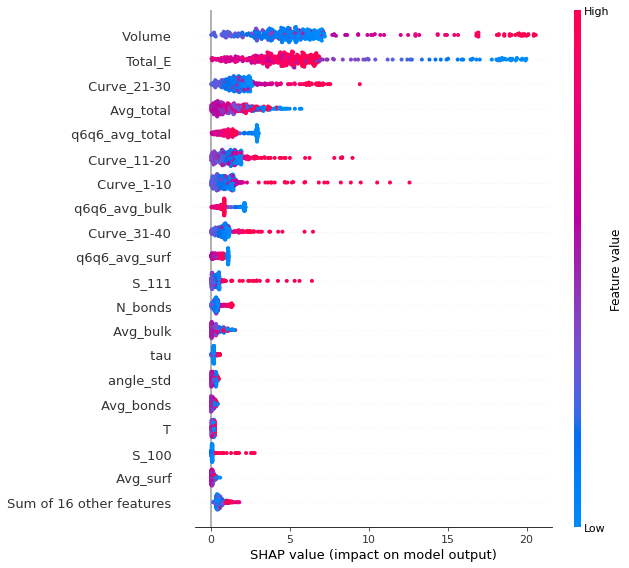

In [243]:
shap.plots.beeswarm(shap_values.abs,max_display=20)


In [245]:
shap_values.feature_names

['T',
 ' tau',
 ' time',
 ' Volume',
 ' S_100',
 ' S_111',
 ' S_110',
 ' S_311',
 ' Curve_1-10',
 ' Curve_11-20',
 ' Curve_21-30',
 ' Curve_31-40',
 ' Curve_41-50',
 ' Curve_51-60',
 ' Curve_61-70',
 ' Curve_71-80',
 ' Avg_total',
 ' Avg_bulk',
 ' Avg_surf',
 ' Total_E',
 ' Formation_E',
 ' Avg_bonds',
 ' Std_bonds',
 ' Max_bonds',
 ' Min_bonds',
 ' N_bonds',
 ' angle_avg',
 ' angle_std',
 ' FCC',
 ' HCP',
 ' ICOS',
 ' DECA',
 ' q6q6_avg_total',
 ' q6q6_avg_bulk',
 ' q6q6_avg_surf']

## Elastic-Net 

Elastic-Net <br>
Combines L1 and L2 norms
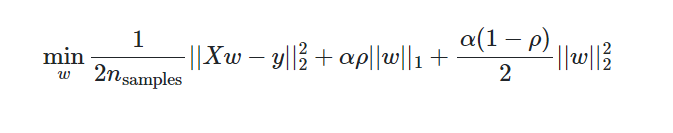

In [155]:
from sklearn.linear_model import ElasticNet


# X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation

elastic_net = ElasticNet()

param_grid = {
    'alpha': np.logspace(-20, 20, 500),
    'l1_ratio': np.linspace(0, 1, 100)  # l1_ratio = 0 means L2 penalty, 1 means L1
} # alpha 500 and l1_ratio 100

# param_grid = {
#     'alpha': np.logspace(-20, 20, 5),
#     'l1_ratio': np.linspace(0, 1, 2)  # l1_ratio = 0 means L2 penalty, 1 means L1
# } # alpha 500 and l1_ratio 100



grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

predictions_list = {'train':None,'test':None,'val':None}

training_start = time.time()
grid_search.fit(features_train, labels_train)
training_end = time.time()

best_params = grid_search.best_params_
print("Best parameters: ", best_params)

best_elastic_net = grid_search.best_estimator_


testing_start = time.time()
y_pred_validation = best_elastic_net.predict(features_validation)
testing_end = time.time()
predictions_list['val'] = y_pred_validation



y_pred_train = best_elastic_net.predict(features_train)
predictions_list['train'] = y_pred_train

test_start = time.time()
y_pred_test = best_elastic_net.predict(features_test)
test_end = time.time()
predictions_list['test'] = y_pred_test


#metrics for train, test and validation
val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val'])
val_r2 = r2_score(labels_validation, predictions_list['val'])
print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} ,MAPD: {val_mapd:.8f} , R^2: {val_r2:.10f}")

train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
train_mae = mean_absolute_error(labels_train, predictions_list['train'])
train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train'])
train_r2 = r2_score(labels_train, predictions_list['train'])
print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f}, MAPD: {train_mapd:.8f} , R^2: {train_r2:.10f}")

test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
test_mae = mean_absolute_error(labels_test, predictions_list['test'])
test_mapd = calc_MAPE_Percentage(labels_test,predictions_list['test'])
test_r2 = r2_score(labels_test, predictions_list['test'])
print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f},MAPD: {test_mapd:.8f} , R^2: {test_r2:.10f}")

print("Time taken for training: {:.10f} seconds".format(training_end - training_start)) 
print("Time taken for testing: {:.10f} seconds".format(testing_end - testing_start))
print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))


# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ", mse)
# r2 = r2_score(y_test, y_pred)
# print("R^2 value: ", r2)

# print("Time taken for training and hyper-parameter tuning: {:.2f} seconds".format(training_end - training_start))
# print("Time taken for testing: {:.2f} seconds".format(testing_end - testing_start))

Best parameters:  {'alpha': 2.4591304254680416e-05, 'l1_ratio': 0.09090909090909091}
Validation set with Linear Regression - RMSE: 0.5243007370, MSE: 0.2748912628, MAE: 0.3727889126 ,MAPD: 2.06037162 , R^2: 0.9950535950
Train set with Linear Regression - RMSE: 0.4799822690, MSE: 0.2303829786, MAE: 0.3469359445, MAPD: 1.85748737 , R^2: 0.9960120315
Test set with Linear Regression - RMSE: 0.4831832348, MSE: 0.2334660384, MAE: 0.3487019739,MAPD: 1.74488863 , R^2: 0.9961467397
Time taken for training: 633.2674691677 seconds
Time taken for testing: 0.0010001659 seconds
Time taken for validation: 0.0000000000 seconds


Objective did not converge. You might want to increase the number of iterations. Duality gap: 421.99086224289846, tolerance: 18.480465414243948


In [97]:
grid_search.best_params_

{'alpha': 2.4591304254680416e-05, 'l1_ratio': 0.09090909090909091}

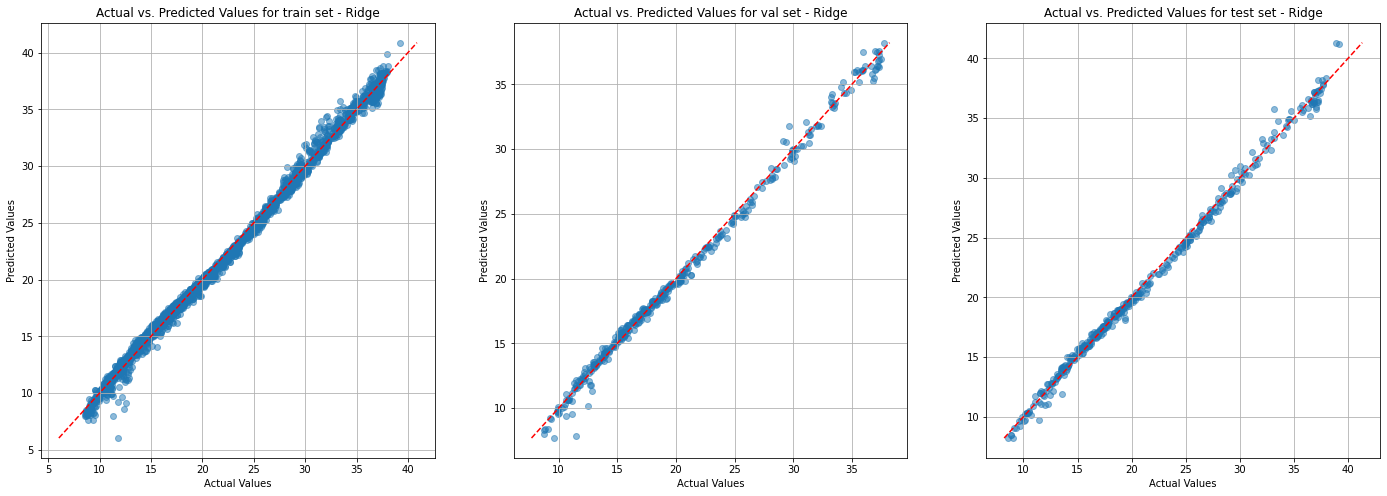

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set - Ridge")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

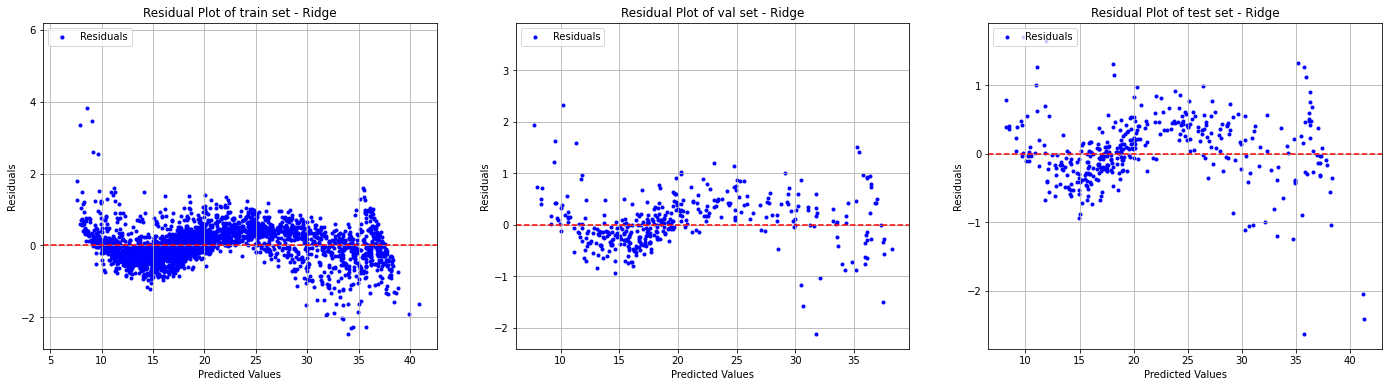

In [99]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals
    
#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Ridge')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


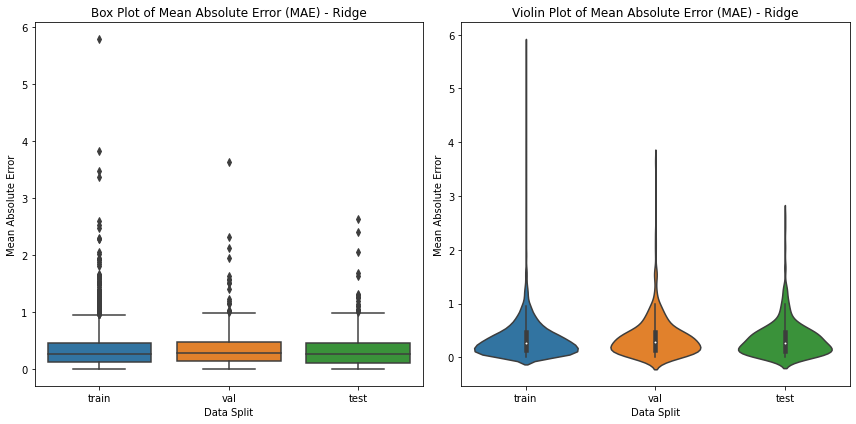

In [100]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])
    
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1) 
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)  
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()